In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Relationship between the Height & Weight')

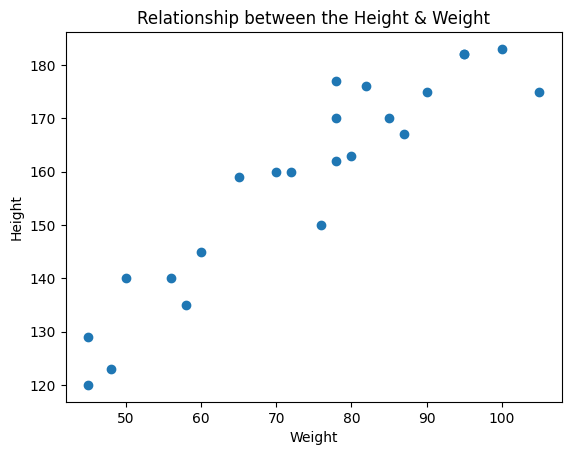

In [4]:
# relationship between the dpendent and teh independent relations
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Relationship between the Height & Weight")

In [5]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


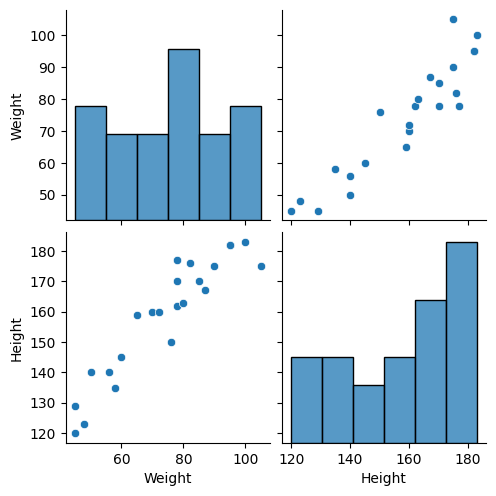

In [6]:
sns.pairplot(data=df)

In [11]:
## independent and the dependent features
# when we try to create a independent feature make sure that feature in in dataframe or it can also be a 2-d array.
# dependent feature can be series.
X=df[['Weight']]
y=df['Height']

In [14]:
np.array(y).shape

(23,)

In [15]:
# train test split
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(17, 1)

In [18]:
X_test.shape

(6, 1)

In [19]:
# standardization
# take up each ind feature and applyz-score and mean=0 and the std.dev=1
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.transform(X_test)

In [23]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [24]:
# apply linear regression
from sklearn.linear_model import LinearRegression


In [25]:
regression=LinearRegression()

In [26]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
regression.coef_

array([17.2982057])

In [28]:
regression.intercept_

np.float64(156.47058823529412)

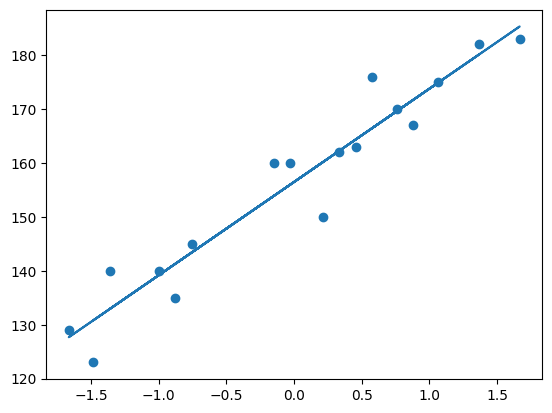

In [30]:
# plot the  training data
plt.scatter(X_train,y_train) 
plt.plot(X_train,regression.predict(X_train))

In [31]:
# prediction for test data
y_pred=regression.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [34]:
rmse=np.sqrt(mse)

In [35]:
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [36]:
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_pred)

In [38]:
score

0.7360826717981276

In [39]:
#ols technique
import statsmodels.api as sm

In [41]:
model=sm.OLS(y_train,X_train).fit()

In [43]:
prediction=model.predict(X_test)

In [44]:
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [46]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 16 Oct 2025   Prob (F-statistic):                       0.664
Time:                        18:53:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## prediction for new data
regression.predict(scaler.transform([[72]]))
# make sure that scaling trainformation need to be done.

C:\Users\Kirat\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])